In [1]:
dataset=[
['아메리카노', '카페라떼'],
['카페라떼', '아이스아메리카노', '카푸치노'],
['바닐라라떼', '아메리카노'],
['녹차라떼', '카페라떼', '아메리카노'],
['카페모카', '아메리카노'],
['아메리카노', '카페라떼'],
['초콜릿', '아메리카노'],
['아메리카노'],
['카페모카', '카페라떼']
]

In [2]:
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd

#트랜잭션 자료형으로 변환
#x축 전체품목, y축 거래아이디(영수증)
te = TransactionEncoder() #자동으로 변환해주는 코드
te_result = te.fit(dataset).transform(dataset)
print(te_result)
df = pd.DataFrame(te_result,
columns=te.columns_)
print(df)
# 데이터프레임으로 변환

[[False False  True False False  True False False]
 [False False False  True False  True False  True]
 [False  True  True False False False False False]
 [ True False  True False False  True False False]
 [False False  True False False False  True False]
 [False False  True False False  True False False]
 [False False  True False  True False False False]
 [False False  True False False False False False]
 [False False False False False  True  True False]]
    녹차라떼  바닐라라떼  아메리카노  아이스아메리카노    초콜릿   카페라떼   카페모카   카푸치노
0  False  False   True     False  False   True  False  False
1  False  False  False      True  False   True  False   True
2  False   True   True     False  False  False  False  False
3   True  False   True     False  False   True  False  False
4  False  False   True     False  False  False   True  False
5  False  False   True     False  False   True  False  False
6  False  False   True     False   True  False  False  False
7  False  False   True     False  False  False  Fals

In [3]:
# 선험적 알고리즘 support > 0.5이상
from mlxtend.frequent_patterns import apriori

itemset = apriori(df, use_colnames=True)
itemset

,support,itemsets
0,0.777778,(아메리카노)
1,0.555556,(카페라떼)


In [4]:
#support 기본값 0.5 구매확률
itemset = apriori(df, min_support=0.1, use_colnames=True)
itemset

,support,itemsets
0,0.111111,(녹차라떼)
1,0.111111,(바닐라라떼)
2,0.777778,(아메리카노)
3,0.111111,(아이스아메리카노)
4,0.111111,(초콜릿)
5,0.555556,(카페라떼)
6,0.222222,(카페모카)
7,0.111111,(카푸치노)
8,0.111111,"(녹차라떼, 아메리카노)"
9,0.111111,"(카페라떼, 녹차라떼)"


In [5]:
#confidence > 0.3(기본값 0.8)
from mlxtend.frequent_patterns import association_rules #연관규칙함수
rules = association_rules(itemset,
metric='confidence', min_threshold=0.6)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(녹차라떼),(아메리카노),0.111111,0.777778,0.111111,1.0,1.285714,0.024691,inf
1,(녹차라떼),(카페라떼),0.111111,0.555556,0.111111,1.0,1.800000,0.049383,inf
2,(바닐라라떼),(아메리카노),0.111111,0.777778,0.111111,1.0,1.285714,0.024691,inf
3,(초콜릿),(아메리카노),0.111111,0.777778,0.111111,1.0,1.285714,0.024691,inf
4,(카페라떼),(아메리카노),0.555556,0.777778,0.333333,0.6,0.771429,-0.098765,0.555556
5,(아이스아메리카노),(카페라떼),0.111111,0.555556,0.111111,1.0,1.800000,0.049383,inf
6,(카푸치노),(아이스아메리카노),0.111111,0.111111,0.111111,1.0,9.000000,0.098765,inf
7,(아이스아메리카노),(카푸치노),0.111111,0.111111,0.111111,1.0,9.000000,0.098765,inf
8,(카푸치노),(카페라떼),0.111111,0.555556,0.111111,1.0,1.800000,0.049383,inf
9,"(카페라떼, 녹차라떼)",(아메리카노),0.111111,0.777778,0.111111,1.0,1.285714,0.024691,inf


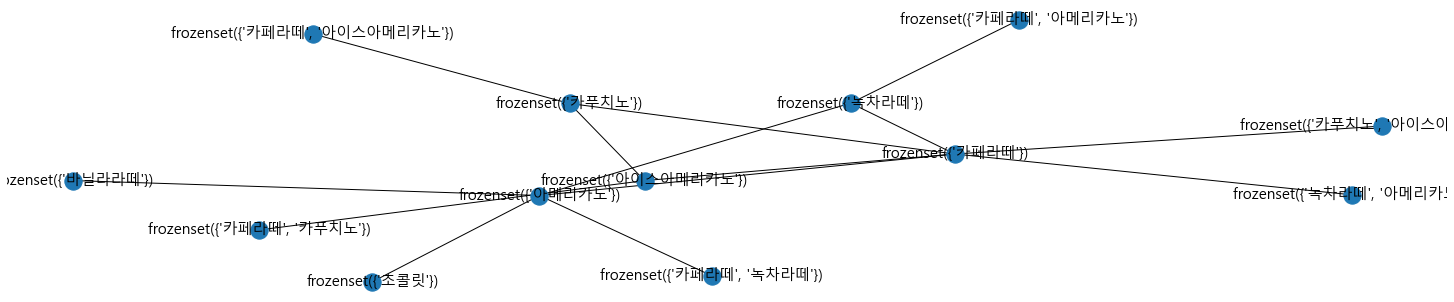

In [6]:
%matplotlib inline
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)
import networkx as nx
import matplotlib.pyplot as plt

ga = nx.from_pandas_edgelist(rules, source='antecedents', target='consequents')
plt.figure(figsize=(20,4))
nx.draw(ga, with_labels=True, font_family=font_name, font_size=15)